In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [9]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [10]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


In [11]:
yen_futures["Settle"] = yen_futures["Settle"].pct_change() * 100
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,NaN,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,0.584197,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,1.756933,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,-0.827626,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,0.129496,19763.0,52072.0


# Data Preparation

### Returns

Date
1990-01-04    200.743067
1990-01-05   -147.106259
1990-01-08   -115.646738
1990-01-09   -588.256614
1990-01-10    -35.958720
Name: Settle, dtype: float64

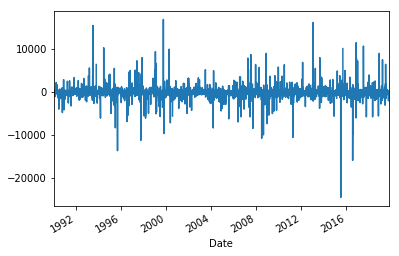

In [13]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!


returns = yen_futures["Settle"].pct_change() * 100

returns.plot()
df = returns.dropna()
df.head()

### Lagged Returns 

In [19]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
yen_futures["Lagged_Returns"] = yen_futures["Settle"].shift()
yen_futures.dropna(inplace=True)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Returns
Date,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,-0.427829,203495.0,196924.0,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,-0.020460,129508.0,197197.0,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,0.020465,160202.0,198280.0,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,-0.204604,103091.0,202990.0,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,0.020502,90654.0,203114.0,-0.204604


### Train Test Split

In [20]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2018'].copy()
test = yen_futures['2018':].copy()

In [21]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
train.head()
#yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Returns
Date,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,-0.427829,203495.0,196924.0,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,-0.020460,129508.0,197197.0,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,0.020465,160202.0,198280.0,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,-0.204604,103091.0,202990.0,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,0.020502,90654.0,203114.0,-0.204604


In [28]:
X_train = train["Lagged_Returns"].to_frame()
y_train = train["Settle"]
X_test = test["Lagged_Returns"].to_frame()
y_test = test["Settle"]
train

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Returns
Date,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,-0.427829,203495.0,196924.0,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,-0.020460,129508.0,197197.0,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,0.020465,160202.0,198280.0,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,-0.204604,103091.0,202990.0,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,0.020502,90654.0,203114.0,-0.204604
2014-02-25,9760.0,9808.0,9744.0,9789.0,32.0,0.327970,105498.0,201486.0,0.020502
2014-02-26,9784.0,9795.0,9746.0,9760.0,29.0,-0.296251,118559.0,200105.0,0.327970
2014-02-27,9769.0,9831.0,9762.0,9798.0,38.0,0.389344,160638.0,201246.0,-0.296251
2014-02-28,9787.0,9848.0,9776.0,9825.0,27.0,0.275566,169374.0,200184.0,0.389344


# Linear Regression Model

In [29]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
# YOUR CODE HERE!
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [31]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
#predictions = model.predict(X_test)

In [34]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
predictions = model.predict(X_test)
Results = y_test.to_frame()
Results["Predicted Returns"] = predictions

# results = pd.DataFrame({
#     "Prediction": predictions, 
#     "Actual": y_test
# }).reset_index(drop=True)
Results.head()

,Settle,Predicted Returns
Date,,
2018-01-02,0.297285,-0.006707
2018-01-03,-0.240479,-0.007568
2018-01-04,-0.213028,-0.001171
2018-01-05,-0.353933,-0.001497
2018-01-08,0.062017,0.000179


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E1A6D0788>,
      dtype=object)

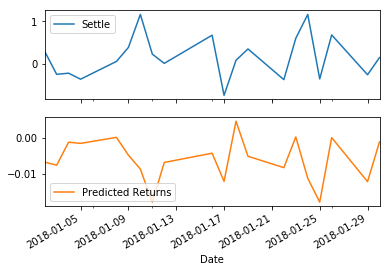

In [36]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
Results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [39]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# YOUR CODE HERE!
MSE = mean_squared_error(Results["Settle"], Results["Predicted Returns"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
RMSE =np.sqrt(MSE)
print(RMSE)

0.4151933603075715


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [40]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
predictions = model.predict(X_train)
Results = y_train.to_frame()
Results["Predicted Returns"] = predictions
# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
MSE = mean_squared_error(Results["Settle"], Results["Predicted Returns"])
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
RMSE =np.sqrt(MSE)
print(RMSE)

0.5657562717010388


# Conclusions

YOUR CONCLUSIONS HERE!

Out of Sample performance is better because it has a lower RMSE, but not by much.  The model is better at modelling new data (out-of-sample) than In-Sample established data.  You won't be able to determine if this model good relative to others unless you compare it to at least another model.